<a href="https://colab.research.google.com/github/sebavassou/Estatistica_Inferencial/blob/main/EINF_aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parametros populacionais
mu = 100
sigma = 15
n = 30  # tamanho da amostra
num_amostras = 1000

# Simular distribuicao amostral
# np.random.seed(42)
medias_amostrais = []

for i in range(num_amostras):
    amostra = np.random.normal(mu, sigma, n)
    media_amostra = np.mean(amostra)
    medias_amostrais.append(media_amostra)

medias_amostrais = np.array(medias_amostrais)

# Valores teoricos
mu_teorico = mu
sigma_teorico = sigma / np.sqrt(n)

# Valores empiricos
mu_empirico = np.mean(medias_amostrais)
sigma_empirico = np.std(medias_amostrais, ddof=0)

print(f"Valores Teoricos:")
print(f"Media das medias amostrais: {mu_teorico}")
print(f"Erro padrao: {sigma_teorico:.4f}")
print(f"\nValores Empiricos:")
print(f"Media das medias amostrais: {mu_empirico:.4f}")
print(f"Erro padrao: {sigma_empirico:.4f}")
print(f"\nDiferenca percentual do erro padrao: {abs(sigma_empirico - sigma_teorico)/sigma_teorico * 100:.2f}%")

Valores Teoricos:
Media das medias amostrais: 100
Erro padrao: 2.7386

Valores Empiricos:
Media das medias amostrais: 99.8656
Erro padrao: 2.6885

Diferenca percentual do erro padrao: 1.83%


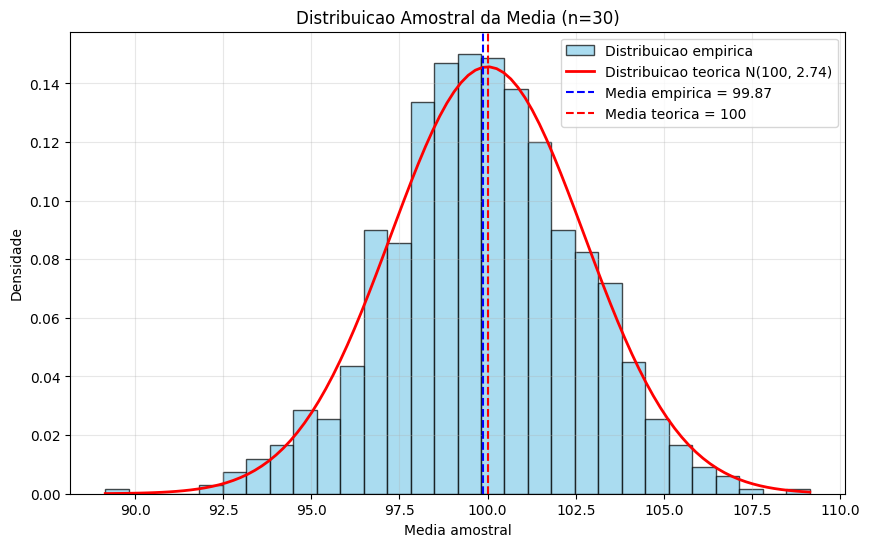

In [ ]:
from scipy import stats

# Criar histograma
plt.figure(figsize=(10, 6))
plt.hist(medias_amostrais, bins=30, density=True, alpha=0.7,
         color='skyblue', edgecolor='black', label='Distribuicao empirica')

# Curva normal teorica
x = np.linspace(medias_amostrais.min(), medias_amostrais.max(), 100)
y = stats.norm.pdf(x, mu_teorico, sigma_teorico)
plt.plot(x, y, 'r-', linewidth=2, label='Distribuicao teorica N({}, {:.2f})'.format(mu_teorico, sigma_teorico))

# Adicionar linhas verticais
plt.axvline(mu_empirico, color='blue', linestyle='--',
            label=f'Media empirica = {mu_empirico:.2f}')
plt.axvline(mu_teorico, color='red', linestyle='--',
            label=f'Media teorica = {mu_teorico}')

plt.xlabel('Media amostral')
plt.ylabel('Densidade')
plt.title('Distribuicao Amostral da Media (n=30)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

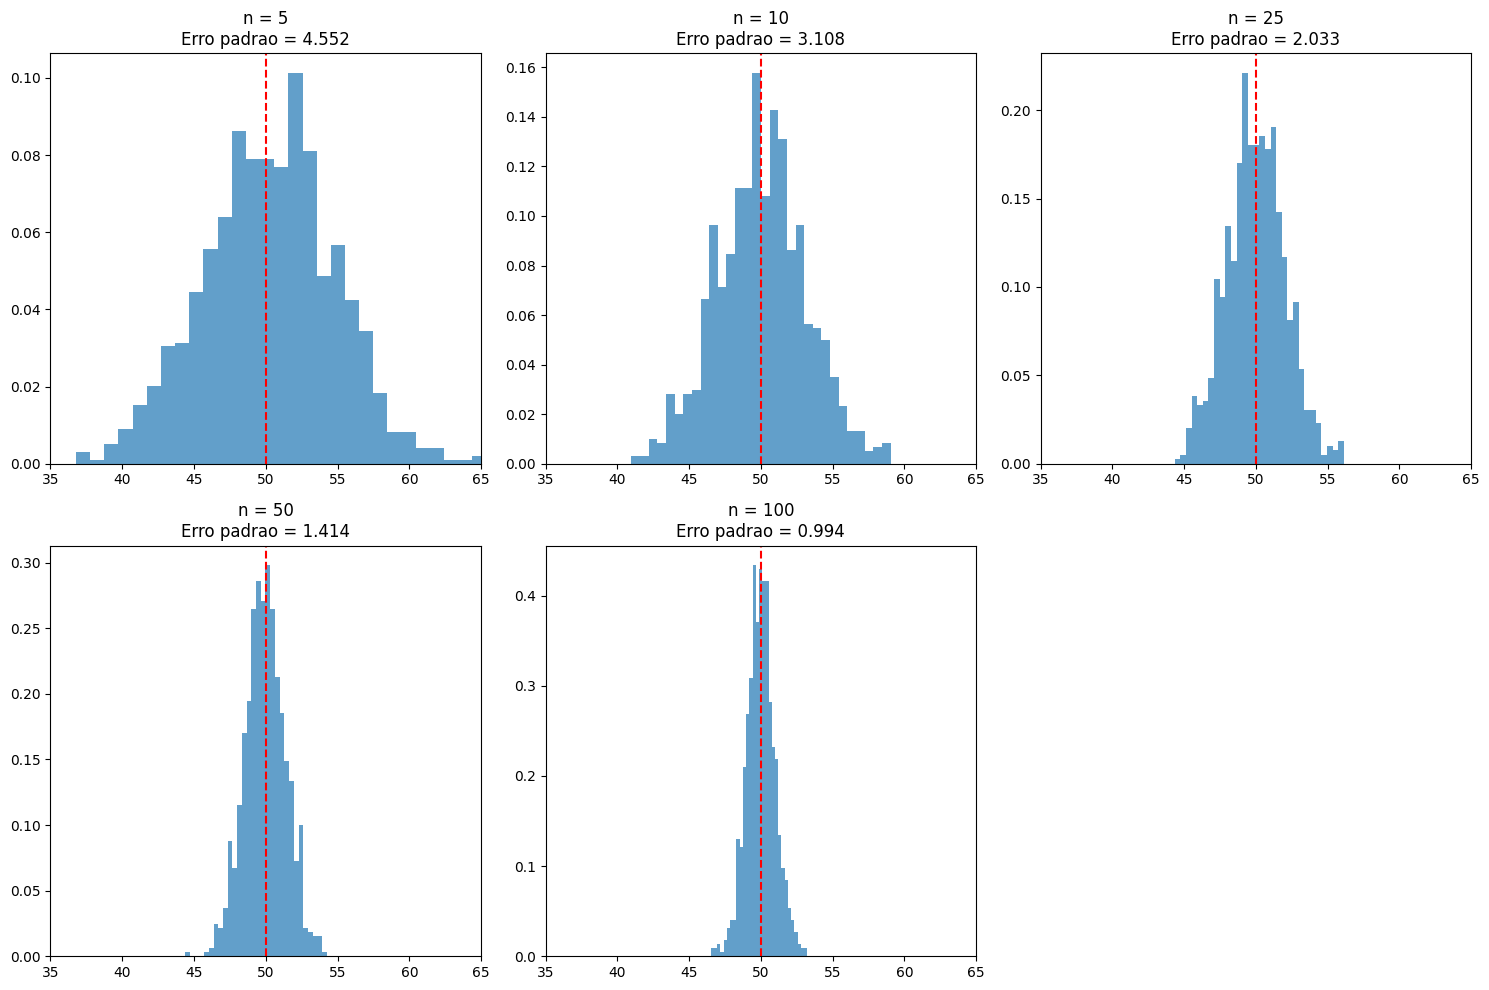

In [ ]:
# Parametros
mu = 50
sigma = 10
tamanhos_amostra = [5, 10, 25, 50, 100]
num_simulacoes = 1000

# Funcao para simular
def simular_distribuicao_amostral(mu, sigma, n, num_sim):
    medias = []
    for _ in range(num_sim):
        amostra = np.random.normal(mu, sigma, n)
        medias.append(np.mean(amostra))
    return np.array(medias)

# Simular para diferentes tamanhos
resultados = {}
for n in tamanhos_amostra:
    medias = simular_distribuicao_amostral(mu, sigma, n, num_simulacoes)
    resultados[n] = {
        'medias': medias,
        'erro_empirico': np.std(medias, ddof=0),
        'erro_teorico': sigma / np.sqrt(n)
    }

    # Criar visualizacao
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, n in enumerate(tamanhos_amostra):
    ax = axes[i]
    ax.hist(resultados[n]['medias'], bins=30, density=True, alpha=0.7)
    ax.set_title(f'n = {n}\nErro padrao = {resultados[n]["erro_empirico"]:.3f}')
    ax.set_xlim(35, 65)
    ax.axvline(mu, color='red', linestyle='--')

# Remover eixo extra
axes[-1].remove()
plt.tight_layout()
plt.show()

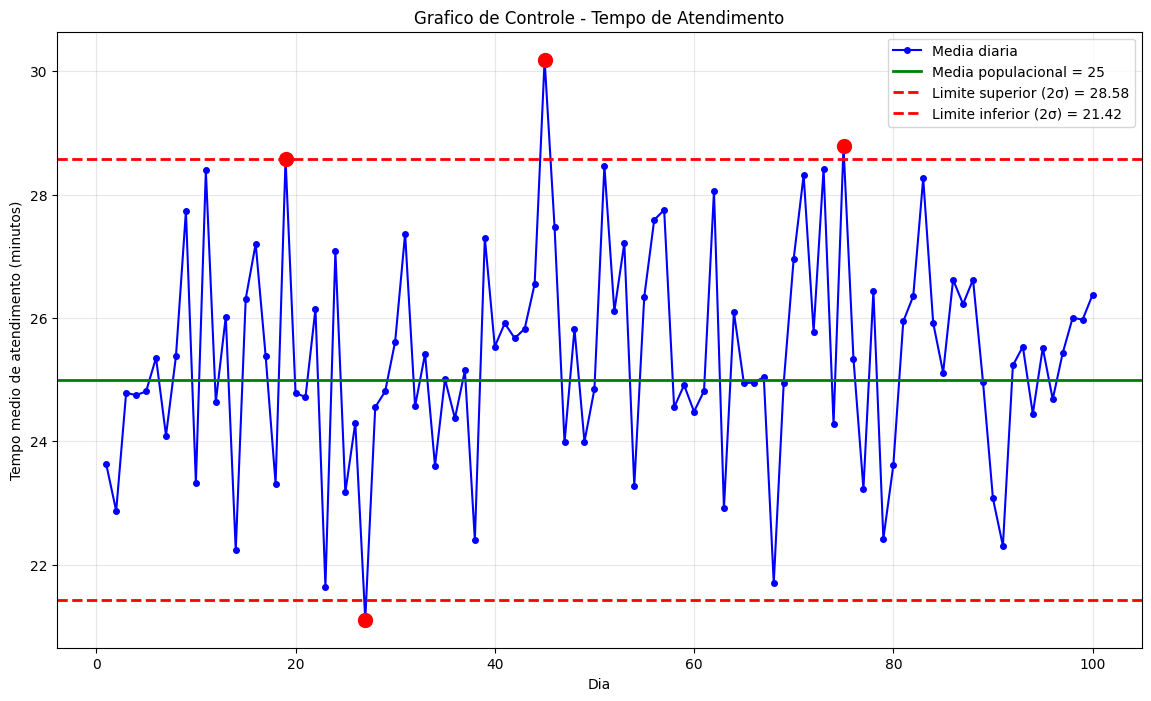

Dias fora de controle: [19, 27, 45, 75]
Percentual de dias fora de controle: 4%
Esperado teoricamente: ~5% (regra 95% para 2 desvios)


In [ ]:
# Parametros do problema
mu_atendimento = 25  # minutos
sigma_atendimento = 8  # minutos
n_atendimentos_dia = 20
num_dias = 100

# Calcular limites de controle
erro_padrao = sigma_atendimento / np.sqrt(n_atendimentos_dia)
limite_superior = mu_atendimento + 2 * erro_padrao
limite_inferior = mu_atendimento - 2 * erro_padrao

# Simular 100 dias
np.random.seed(42)
medias_diarias = []
dias_fora_controle = []

for dia in range(num_dias):
    # Simular atendimentos do dia
    tempos_dia = np.random.normal(mu_atendimento, sigma_atendimento, n_atendimentos_dia)
    media_dia = np.mean(tempos_dia)
    medias_diarias.append(media_dia)

    # Verificar se esta fora de controle
    if media_dia < limite_inferior or media_dia > limite_superior:
        dias_fora_controle.append(dia + 1)

medias_diarias = np.array(medias_diarias)

# Criar grafico de controle
plt.figure(figsize=(14, 8))

# Plotar medias diarias
plt.plot(range(1, num_dias + 1), medias_diarias, 'b-', marker='o',
         markersize=4, label='Media diaria')

# Linhas de controle
plt.axhline(mu_atendimento, color='green', linestyle='-', linewidth=2,
            label=f'Media populacional = {mu_atendimento}')
plt.axhline(limite_superior, color='red', linestyle='--', linewidth=2,
            label=f'Limite superior (2σ) = {limite_superior:.2f}')
plt.axhline(limite_inferior, color='red', linestyle='--', linewidth=2,
            label=f'Limite inferior (2σ) = {limite_inferior:.2f}')

# Destacar pontos fora de controle
for dia in dias_fora_controle:
    plt.scatter(dia, medias_diarias[dia-1], color='red', s=100, zorder=5)

plt.xlabel('Dia')
plt.ylabel('Tempo medio de atendimento (minutos)')
plt.title('Grafico de Controle - Tempo de Atendimento')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dias fora de controle: {dias_fora_controle}")
print(f"Percentual de dias fora de controle: {len(dias_fora_controle)}%")
print(f"Esperado teoricamente: ~5% (regra 95% para 2 desvios)")

EXEMPLO 2 - DISTRIBUIÇÃO AMOSTRAL DA MÉDIA
População: μ = 20, σ = 4
Amostra: n = 25

a) Distribuição de X̄:
X̄ ~ N(20, 0.800²)

b) P(X̄ > 22):
P(X̄ > 22) = 0.006210
P(X̄ > 22) = 0.0062 ou 0.62%

c) Percentil 95 de X̄:
X̄₀.₉₅ = 21.316

INFORMAÇÕES ADICIONAIS:
-------------------------
Percentil 90: 21.025
Percentil 99: 21.861
P(X̄ < 19): 0.1056
P(18 < X̄ < 22): 0.9876



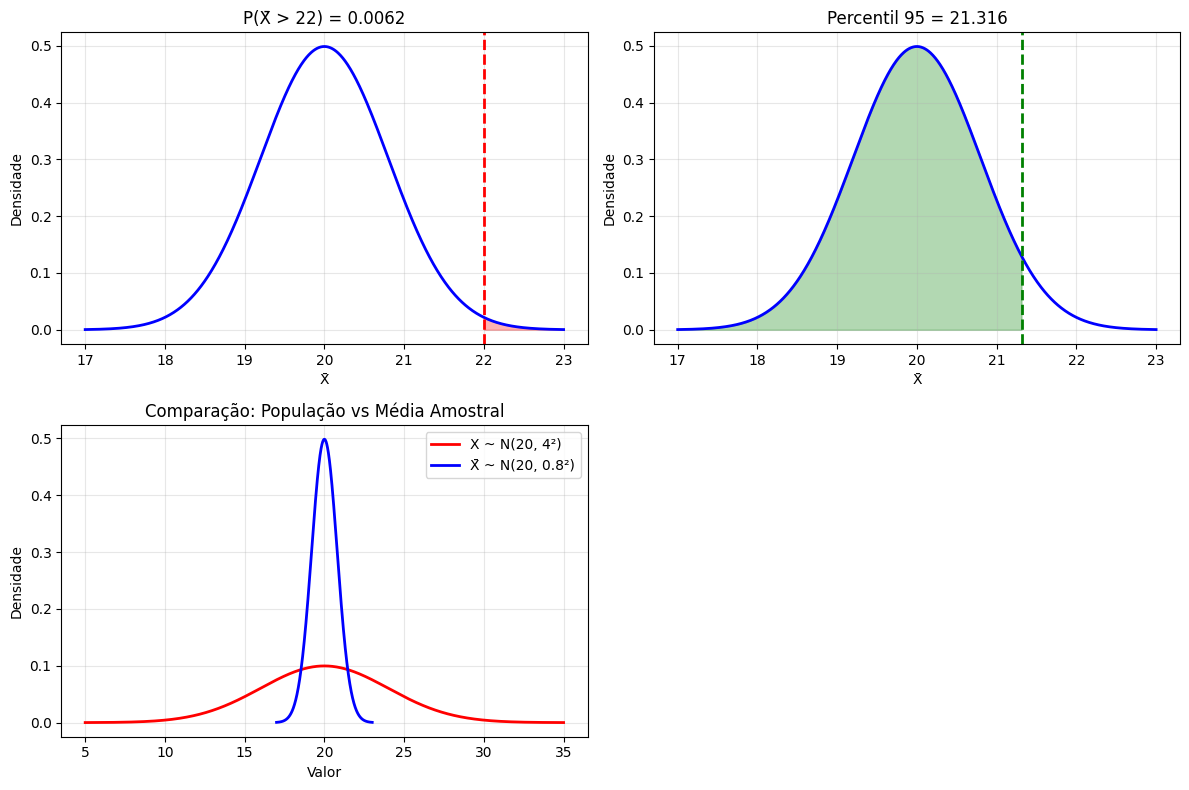

RESUMO:
a) X̄ ~ N(20, 0.800²)
b) P(X̄ > 22) = 0.0062
c) Percentil 95 = 21.316


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Dados do problema
mu = 20          # média populacional
sigma = 4        # desvio padrão populacional
n = 25           # tamanho da amostra

print("EXEMPLO 2 - DISTRIBUIÇÃO AMOSTRAL DA MÉDIA")
print("="*50)
print(f"População: μ = {mu}, σ = {sigma}")
print(f"Amostra: n = {n}")
print()

# a) Distribuição de X̄
mu_xbar = mu                    # média de X̄
sigma_xbar = sigma / np.sqrt(n) # erro padrão

# Criar a distribuição de X̄
dist_xbar = stats.norm(loc=mu_xbar, scale=sigma_xbar)

print("a) Distribuição de X̄:")
print(f"X̄ ~ N({mu_xbar}, {sigma_xbar:.3f}²)")
print()

# b) P(X̄ > 22)
prob_maior_22 = 1 - dist_xbar.cdf(22)
print("b) P(X̄ > 22):")
print(f"P(X̄ > 22) = {prob_maior_22:.6f}")
print(f"P(X̄ > 22) = {prob_maior_22:.4f} ou {prob_maior_22*100:.2f}%")
print()

# c) Percentil 95
percentil_95 = dist_xbar.ppf(0.95)
print("c) Percentil 95 de X̄:")
print(f"X̄₀.₉₅ = {percentil_95:.3f}")
print()


# Visualização
x = np.linspace(17, 23, 1000)
y = dist_xbar.pdf(x)

plt.figure(figsize=(12, 8))

# Subplot 1: P(X̄ > 22)
plt.subplot(2, 2, 1)
plt.plot(x, y, 'b-', linewidth=2)
plt.fill_between(x[x >= 22], dist_xbar.pdf(x[x >= 22]), alpha=0.3, color='red')
plt.axvline(22, color='red', linestyle='--', linewidth=2)
plt.title(f'P(X̄ > 22) = {prob_maior_22:.4f}')
plt.xlabel('X̄')
plt.ylabel('Densidade')
plt.grid(True, alpha=0.3)

# Subplot 2: Percentil 95
plt.subplot(2, 2, 2)
plt.plot(x, y, 'b-', linewidth=2)
plt.fill_between(x[x <= percentil_95], dist_xbar.pdf(x[x <= percentil_95]), alpha=0.3, color='green')
plt.axvline(percentil_95, color='green', linestyle='--', linewidth=2)
plt.title(f'Percentil 95 = {percentil_95:.3f}')
plt.xlabel('X̄')
plt.ylabel('Densidade')
plt.grid(True, alpha=0.3)

# Subplot 3: Comparação com distribuição original
plt.subplot(2, 2, 3)
x_pop = np.linspace(5, 35, 1000)
dist_original = stats.norm(loc=mu, scale=sigma)
plt.plot(x_pop, dist_original.pdf(x_pop), 'r-', linewidth=2, label=f'X ~ N({mu}, {sigma}²)')
plt.plot(x, y, 'b-', linewidth=2, label=f'X̄ ~ N({mu_xbar}, {sigma_xbar:.1f}²)')
plt.title('Comparação: População vs Média Amostral')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("RESUMO:")
print("="*20)
print(f"a) X̄ ~ N({mu_xbar}, {sigma_xbar:.3f}²)")
print(f"b) P(X̄ > 22) = {prob_maior_22:.4f}")
print(f"c) Percentil 95 = {percentil_95:.3f}")

In [ ]:
# Exemplo 4 (aula 02)
import numpy as np
from scipy import stats

# Dados
p = 0.27    # proporção populacional
n = 100     # tamanho da amostra

# Distribuição amostral de p̂
mu_p_hat = p
sigma_p_hat = np.sqrt(p * (1-p) / n)

# Criar distribuição normal para p̂
dist_p_hat = stats.norm(loc=mu_p_hat, scale=sigma_p_hat)

# P(p̂ > 0.30)
prob = 1 - dist_p_hat.cdf(0.30)

print(f"p = {p}")
print(f"n = {n}")
print(f"p̂ ~ N({mu_p_hat}, {sigma_p_hat:.4f}²)")
print(f"P(p̂ > 0.30) = {prob:.4f}")